In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

%matplotlib inline

In [2]:
fbi = pd.read_excel('C:/Users/marwi/OneDrive/Desktop/t_direct/new_york.xls', skiprows=4)

In [3]:
fbi

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


In [4]:
fbi.drop([348,349,350], axis=0, inplace=True)

In [5]:
fbi.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,10685.0,3.0,0.0,NaN,0.0,2.0,1.0,541.0,9.0,529.0,3.0,NaN
344,Woodridge Village,829.0,7.0,0.0,NaN,0.0,0.0,7.0,17.0,8.0,9.0,0.0,0.0
345,Woodstock Town,5931.0,2.0,0.0,NaN,0.0,0.0,2.0,58.0,13.0,45.0,0.0,NaN
346,Yonkers,199134.0,1036.0,6.0,NaN,25.0,390.0,615.0,2368.0,470.0,1662.0,236.0,10.0
347,Yorktown Town,36643.0,15.0,0.0,NaN,0.0,2.0,13.0,334.0,45.0,287.0,2.0,NaN


In [6]:
fbi.drop(fbi.columns[4], axis=1, inplace=True)
fbi.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [7]:
fbi.columns = ['City', 'Population', 'ViolentCrime', 'Murder', 'Rape2', 'Robbery', 'AggAssault', 'Property', 'Burglary', 'Larcen', 'AutoTheft', 'Arson']
fbi.head()

,City,Population,ViolentCrime,Murder,Rape2,Robbery,AggAssault,Property,Burglary,Larcen,AutoTheft,Arson
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [8]:
fb2 = pd.DataFrame(data=fbi, columns=['City', 'Population', 'Murder', 'Robbery', 'Property'])
fb2

,City,Population,Murder,Robbery,Property
0,Adams Village,1861.0,0.0,0.0,12.0
1,Addison Town and Village,2577.0,0.0,0.0,24.0
2,Akron Village,2846.0,0.0,0.0,16.0
3,Albany,97956.0,8.0,227.0,4090.0
4,Albion Village,6388.0,0.0,4.0,223.0
5,Alfred Village,4089.0,0.0,3.0,46.0
6,Allegany Village,1781.0,0.0,0.0,10.0
7,Amherst Town,118296.0,1.0,31.0,2118.0
8,Amityville Village,9519.0,0.0,4.0,210.0
9,Amsterdam,18182.0,0.0,12.0,405.0


In [9]:
fb2['Pop_Sqr'] = fb2['Population'] ** 2
fb2.head()

,City,Population,Murder,Robbery,Property,Pop_Sqr
0,Adams Village,1861.0,0.0,0.0,12.0,3.463321e+06
1,Addison Town and Village,2577.0,0.0,0.0,24.0,6.640929e+06
2,Akron Village,2846.0,0.0,0.0,16.0,8.099716e+06
3,Albany,97956.0,8.0,227.0,4090.0,9.595378e+09
4,Albion Village,6388.0,0.0,4.0,223.0,4.080654e+07


In [10]:
def func_cat(x): 
    if x > 0: 
        return 1 
    else: 
        return 0

In [11]:
fb2['Robbery_cat'] = fb2['Robbery'].apply(func_cat)
fb2['Murder_cat'] = fb2['Murder'].apply(func_cat)

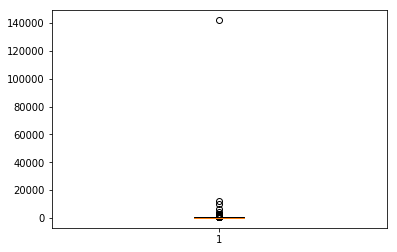

In [12]:
plt.boxplot(fb2.Property)
plt.show()

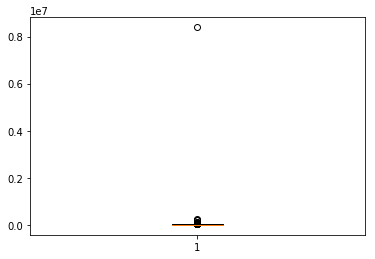

In [13]:
plt.boxplot(fb2.Population)
plt.show()

In [14]:
fb2.sort_values('Property', ascending=False)

,City,Population,Murder,Robbery,Property,Pop_Sqr,Robbery_cat,Murder_cat
216,New York,8396126.0,335.0,19170.0,141971.0,7.049493e+13,1,1
35,Buffalo,258789.0,47.0,1322.0,12491.0,6.697175e+10,1,1
272,Rochester,210562.0,42.0,918.0,10051.0,4.433636e+10,1,1
310,Syracuse,143834.0,21.0,400.0,6473.0,2.068822e+10,1,1
3,Albany,97956.0,8.0,227.0,4090.0,9.595378e+09,1,1
218,Niagara Falls,49574.0,3.0,166.0,2807.0,2.457581e+09,1,1
285,Schenectady,66041.0,8.0,203.0,2800.0,4.361414e+09,1,1
53,Cheektowaga Town,78361.0,0.0,48.0,2689.0,6.140446e+09,1,0
321,Utica,61686.0,7.0,102.0,2528.0,3.805163e+09,1,1
346,Yonkers,199134.0,6.0,390.0,2368.0,3.965435e+10,1,1


In [15]:
fb2.sort_values('Population', ascending=False)

,City,Population,Murder,Robbery,Property,Pop_Sqr,Robbery_cat,Murder_cat
216,New York,8396126.0,335.0,19170.0,141971.0,7.049493e+13,1,1
35,Buffalo,258789.0,47.0,1322.0,12491.0,6.697175e+10,1,1
272,Rochester,210562.0,42.0,918.0,10051.0,4.433636e+10,1,1
346,Yonkers,199134.0,6.0,390.0,2368.0,3.965435e+10,1,1
310,Syracuse,143834.0,21.0,400.0,6473.0,2.068822e+10,1,1
7,Amherst Town,118296.0,1.0,31.0,2118.0,1.399394e+10,1,1
3,Albany,97956.0,8.0,227.0,4090.0,9.595378e+09,1,1
126,Greece Town,96667.0,0.0,60.0,2303.0,9.344509e+09,1,0
267,Ramapo Town,87204.0,2.0,9.0,567.0,7.604538e+09,1,1
57,Clarkstown Town,80705.0,0.0,17.0,1515.0,6.513297e+09,1,0


In [16]:
fb2.drop([216, 35, 272, 346, 310, 3], inplace=True)

In [17]:
regr = linear_model.LinearRegression()
x = fb2[['Population', 'Pop_Sqr', 'Robbery_cat', 'Murder_cat', ]]
y = fb2['Property']
regr.fit(x, y)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print('R-Squared: ', regr.score(x, y))

Coefficients:  [ 2.10505189e-02 -3.81143405e-09  5.65577132e+01  1.55025675e+02]
Intercept:  -48.37899610073799
R-Squared:  0.7287351545655776


In [18]:
linear_formula = 'Property ~ Population+Pop_Sqr+Robbery_cat+Murder_cat'
lm = ols(formula=linear_formula, data=fb2).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Property   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     226.3
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           4.16e-94
Time:                        07:33:50   Log-Likelihood:                -2358.8
No. Observations:                 342   AIC:                             4728.
Df Residuals:                     337   BIC:                             4747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -48.3790     22.347     -2.165      0.031     -92.335      -4.423
Population      0.0211      0.002      9.537      0.000       0.017       0.025
Pop_Sqr     -3.811e-09   2.54e-08     -0.150      0.881   -5.38e-08    4.62e-08
Robbery_cat    56.5577     31.580      1.791      0.074      -5.562     118.677
Murder_cat    155.0257     45.271      3.424      0.001      65.976     244.076
==============================================================================
Omnibus:                      171.926   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3187.115
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                      17.598   Cond. No.                     4.91e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Property = -48.379 + (0.0211xPopulation) + (-3.811xPop_Sqr) + (56.56xRobbery_cat) + (155xMurder_cat) 

The R-squared was at .996 before I dropped a few rows based on outliers in population size and property crimes that interfered with the models performance due to biased conditions in certain cities. This reduced the r-square to 0.729 which expresses that the model can provide more realistic representation but not so perfect predictions of property crimes. The intercept at -48.379 represents that there are significant factors to predict the possibility for property crime. The population and pop_sqr coefficients show that significantly sized populations have a higher likelyhood for property crime even if there are no murders or robberies. The robbery and murder coefficients show that cities with murders are nearly three times more likely to have property crime than cities with robbery. But cities with at least one robbery reported per year are likely to have at least one property crime. 